# **Data Preprocessing Handling Outliers**

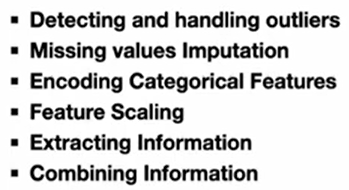

To Disscussion is on Univariate 

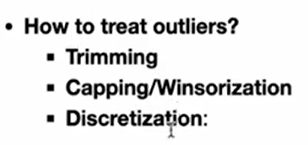

In [1]:
import numpy as np
import pandas as pd

# np.random.seed(42)

# # 1. Generate base normal data
# n_rows = 10000
# x1 = np.random.normal(loc=30, scale=5, size=n_rows)
# x2 = np.random.normal(loc=1.0, scale=0.5, size=n_rows)
# y  = 0.5 * x1 + 10 * x2 + np.random.normal(loc=0, scale=2, size=n_rows)  # simple linear relationship

# # 2. Add various outliers manually
# outlier_indices = np.random.choice(n_rows, 20, replace=False)

# # Global outlier: add large values to y
# y[outlier_indices[:5]] += 50

# # Point outlier: make x1 very large/small
# x1[outlier_indices[5:10]] = np.random.choice([100, -50], size=5)

# # Contextual outlier: x2 high but x1 low
# x1[outlier_indices[10:15]] = 10
# x2[outlier_indices[10:15]] = 5.0

# # Multivariate outlier: x1 and x2 look normal separately, but abnormal together
# x1[outlier_indices[15:]] = 40
# x2[outlier_indices[15:]] = 0.1

# # 3. Create DataFrame
# df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})


df = pd.read_csv(r"D:\Codes\MachineLearning\Datasets\outliers.csv")

print(df.head())
print(df.tail())
print(df.shape)


     x1        x2     y
0  11.0  0.140452  11.0
1  19.0  0.473867  15.0
2  31.0  1.713352  20.0
3  16.0  0.888953  13.0
4  36.0  0.118194  23.0
        x1        x2     y
9995  30.0  1.705223  20.0
9996  28.0  2.444101  19.0
9997  37.0  1.089873  24.0
9998  36.0  0.776210  23.0
9999  31.0  0.817765  20.0
(10000, 3)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10000 non-null  float64
 1   x2      10000 non-null  float64
 2   y       10000 non-null  float64
dtypes: float64(3)
memory usage: 234.5 KB


In [3]:
df.isna().sum()

x1    0
x2    0
y     0
dtype: int64

In [4]:
df.describe()

,x1,x2,y
count,10000.0000,10000.000000,10000.000000
mean,29.9199,0.795030,19.959300
std,10.0421,0.599598,5.034697
min,-6.0000,-0.127513,2.000000
25%,23.0000,0.318087,17.000000
50%,30.0000,0.688281,20.000000
75%,37.0000,1.137827,23.000000
max,66.0000,3.748642,38.000000


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


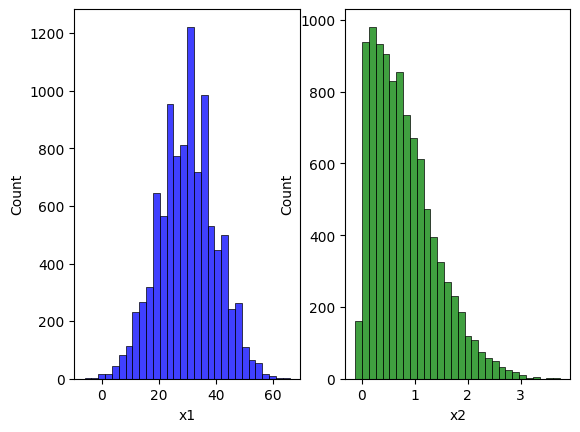

In [6]:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

sns.histplot(x="x1", data=df, bins=30, color="blue", ax=ax1)
sns.histplot(x="x2", data=df, bins=30, color="green", ax=ax2)

plt.show()


In [7]:
mean = df.x1.mean()
std = df.x1.std()
max = df.x1.max()
min = df.x1.min()

print("Mean: ", mean)
print("standard dev: ", std)
print("Max: ", max)
print("Min: ", min)

Mean:  29.9199
standard dev:  10.04209979868935
Max:  66.0
Min:  -6.0


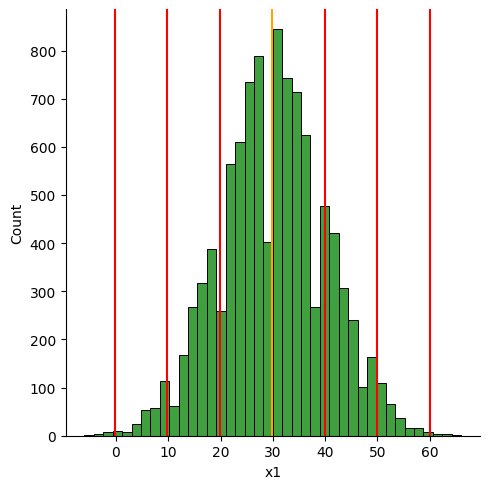

In [8]:
sns.displot(x="x1", data=df, kind="hist", bins=40, color="green")
plt.axvline(df.x1.mean(), color="orange")
for i in [-3, -2, -1, 1, 2 , 3]:
    plt.axvline(mean+i*std, color="red")
plt.show()

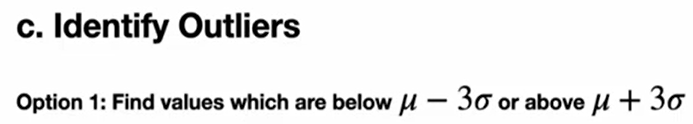

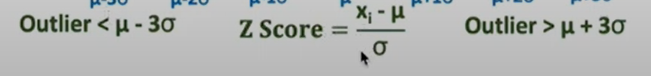

In [9]:
lowerLimit = mean - 3 * std
upperLimit = mean + 3 * std

print("Lower Limit: ", lowerLimit)
print("Upper Limit: ", upperLimit)



Lower Limit:  -0.20639939606805058
Upper Limit:  60.04619939606805


In [10]:
df[df.x1>upperLimit]

,x1,x2,y
1322,63.0,1.351085,36.0
2195,64.0,1.069022,37.0
2411,63.0,0.032994,36.0
5544,62.0,1.907387,36.0
6171,61.0,0.694187,35.0
6668,66.0,0.920489,38.0
9500,61.0,1.635512,35.0


In [11]:
df[df.x1<lowerLimit]

,x1,x2,y
765,-1.0,0.158337,5.0
825,-1.0,1.095189,5.0
1138,-2.0,0.044623,4.0
3493,-1.0,-0.001617,5.0
6639,-4.0,2.498395,3.0
6707,-1.0,1.630756,4.0
7116,-3.0,0.292362,4.0
7825,-4.0,0.053568,3.0
8832,-6.0,0.885744,2.0
9443,-2.0,0.263597,4.0


**OUTLIERS**

In [12]:
df[(df.x1 > upperLimit) | (df.x1 < lowerLimit)]

,x1,x2,y
765,-1.0,0.158337,5.0
825,-1.0,1.095189,5.0
1138,-2.0,0.044623,4.0
1322,63.0,1.351085,36.0
2195,64.0,1.069022,37.0
2411,63.0,0.032994,36.0
3493,-1.0,-0.001617,5.0
5544,62.0,1.907387,36.0
6171,61.0,0.694187,35.0
6639,-4.0,2.498395,3.0


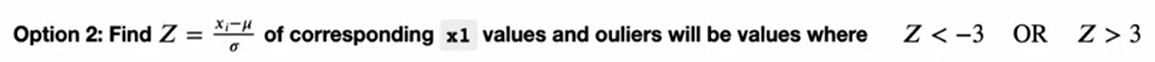

In [14]:
newdf = df[(df.x1 <= upperLimit) & (df.x1 >= lowerLimit)]

In [15]:
newdf

,x1,x2,y
0,11.0,0.140452,11.0
1,19.0,0.473867,15.0
2,31.0,1.713352,20.0
3,16.0,0.888953,13.0
4,36.0,0.118194,23.0
...,...,...,...
9995,30.0,1.705223,20.0
9996,28.0,2.444101,19.0
9997,37.0,1.089873,24.0
9998,36.0,0.776210,23.0


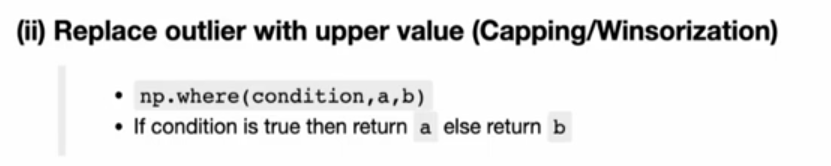

In [21]:
cappedDf = df.copy()

In [ ]:
cappedDf["x1"] = np.where(df["x1"] < lowerLimit, lowerLimit,
                          (np.where(df["x1"] > upperLimit, upperLimit,df["x1"])))
      
      
                        
cappedDf

,x1,x2,y
0,60.046199,0.140452,11.0
1,60.046199,0.473867,15.0
2,60.046199,1.713352,20.0
3,60.046199,0.888953,13.0
4,60.046199,0.118194,23.0
...,...,...,...
9995,60.046199,1.705223,20.0
9996,60.046199,2.444101,19.0
9997,60.046199,1.089873,24.0
9998,60.046199,0.776210,23.0


In [25]:
df.describe()

,x1,x2,y
count,10000.0000,10000.000000,10000.000000
mean,29.9199,0.795030,19.959300
std,10.0421,0.599598,5.034697
min,-6.0000,-0.127513,2.000000
25%,23.0000,0.318087,17.000000
50%,30.0000,0.688281,20.000000
75%,37.0000,1.137827,23.000000
max,66.0000,3.748642,38.000000


In [26]:
cappedDf.describe()

,x1,x2,y
count,10000.000000,10000.000000,10000.000000
mean,59.979922,0.795030,19.959300
std,1.997353,0.599598,5.034697
min,-0.206399,-0.127513,2.000000
25%,60.046199,0.318087,17.000000
50%,60.046199,0.688281,20.000000
75%,60.046199,1.137827,23.000000
max,60.046199,3.748642,38.000000


### **IQR Methods**

<Axes: xlabel='x2'>

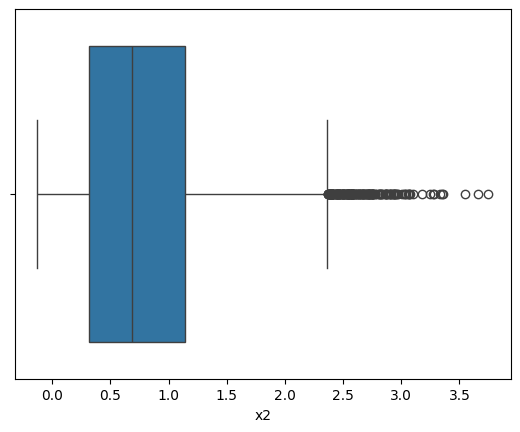

In [28]:
sns.boxplot(x=df["x2"], data=df)

In [29]:
iqr1 = df["x2"].quantile(0.25)
iqr3 = df["x2"].quantile(0.75)

iqr = iqr3 - iqr1

iqr

np.float64(0.8197399004172614)

In [30]:
lowerLimitiqr = iqr1 - 1.5 * iqr
upperLimitiqr = iqr3 + 1.5 * iqr

lowerLimitiqr, upperLimitiqr


(np.float64(-0.9115229048744358), np.float64(2.36743669679461))

In [31]:
df[df["x2"] < lowerLimitiqr]

,x1,x2,y


In [32]:
df[df["x2"] > upperLimitiqr]


,x1,x2,y
11,32.0,2.674464,21.0
35,25.0,2.856379,18.0
80,36.0,2.579868,23.0
147,18.0,2.976488,14.0
148,39.0,2.547117,24.0
...,...,...,...
9716,36.0,2.548617,23.0
9784,32.0,2.467331,21.0
9836,47.0,2.735268,29.0
9982,41.0,2.579395,26.0


In [34]:
newdfiqr = df[(df["x2"] >= lowerLimitiqr) & (df["x2"] <= upperLimitiqr)]

newdfiqr.shape

(9820, 3)

<Axes: xlabel='x2'>

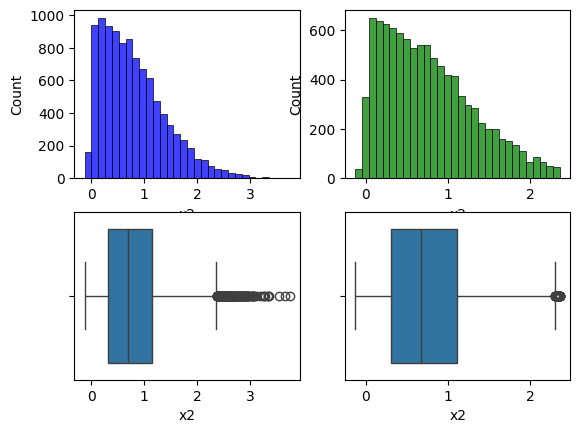

In [35]:
fig, ((ax1, ax2), ( ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
sns.histplot(x="x2", data=df, bins=30, color="blue", ax=ax1)
sns.histplot(x="x2", data=newdfiqr, bins=30, color="green", ax=ax2)
sns.boxplot(x="x2", data=df, ax=ax3)
sns.boxplot(x="x2", data=newdfiqr, ax=ax4)

then again use capping or winsorization